## Final Project Submission

Please fill out:
* Student name: Henry Kemboi
* Student pace: full time - remote
* Scheduled project review date/time: 
* Instructor name: Lucille / Asha
* Blog post URL:


### Project Overview

This project uses data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### Business Problem
A company is expanding and they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters has been provided under the data folder named `AviationData.csv`. The task is to determine which aircraft are the lowest risk for the company to start this new business endeavor and then translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 1. Setup

In the cell below, import the `pandas` library using the standard alias `pd`, `numpy` as `np` and `matplotlib.pyplot` as `plt`.

In [2]:
# Import Pandas with the standard alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Data into a DataFrame Called `aviation_data`

The file path is `AviationData.csv` located within the data folder. Use pandas to read in the data from this CSV file and create a dataframe named `aviation_data` using the correct encoding.

In [3]:
aviation_data = pd.read_csv("./data/AviationData.csv", encoding='latin-1', low_memory=False)
pd.options.display.max_columns = None
aviation_data.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 3. Data Cleaning and Filter Data to Find the Top Number of Accidents by Aircraft Make and Model

Let us grab the accident, make and model columns from the avition_data dataframe to analyze the number of accidents per make and model of aircraft. Modify dataframe so that it only contains rows where Model is not missing (i.e. is not NaN). Thereafter we will first change all the Make column to Title case. Since the dataset is very large, we only display the top 30 Makes.

In [4]:
#Convert all values in the Make column names to Title case

aviation_data["Make"]= aviation_data["Make"].str.title()

# Drop rows where Model is NaN
aviation_data = aviation_data.dropna(subset=["Model"])

#Get the count of accidents per make and model
top_accidents_per_make = aviation_data['Make'].value_counts().head(30)
top_accidents_per_model = aviation_data['Model'].value_counts().head(30)


In [5]:
# Convert the dictionaries to a pandas series for easier plotting
top_accidents_per_make_series = pd.Series(top_accidents_per_make)
top_accidents_per_model_series = pd.Series(top_accidents_per_model)

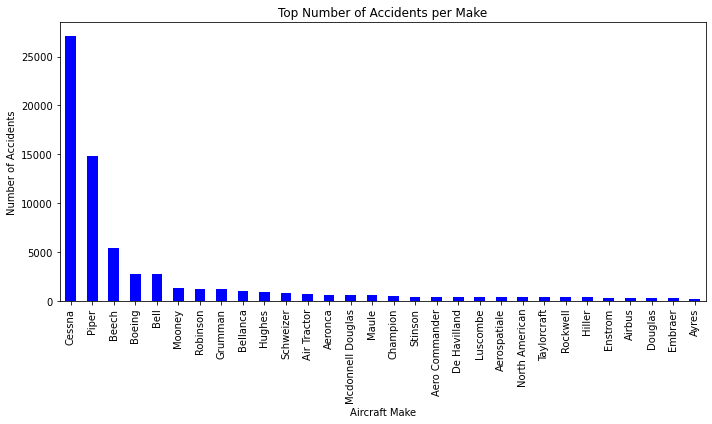

In [6]:
# Plotting the graph for top accidents per make
plt.figure(figsize=(10, 6))
top_accidents_per_make_series.plot(kind='bar', color='blue')
plt.title('Top Number of Accidents per Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

#### Let us now show the top number of accidents per model

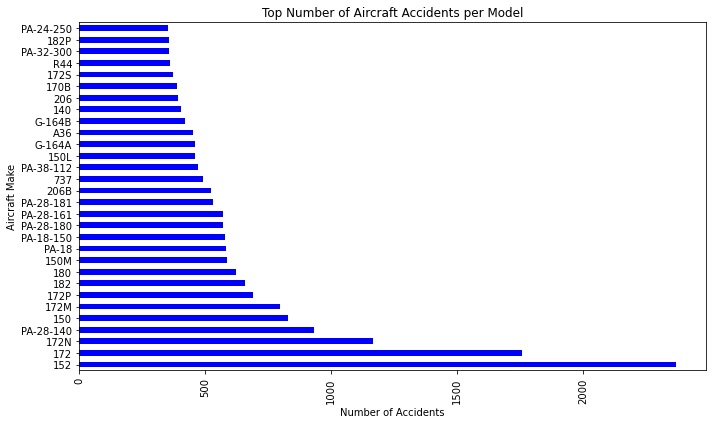

In [7]:
# Plotting the graph for least accidents per make
plt.figure(figsize=(10, 6))
top_accidents_per_model_series.plot(kind='barh', color='blue')
plt.title('Top Number of Aircraft Accidents per Model')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

From the above bar graphs, it is clear that aircrafts of Cessna Make have the highest number of accidents while aircrafts of the model 152 have the highest number of accidents.

Now Let us explore the relationship between the number of accidents per both make and model.

## 4 Explorative Analysis 
### 4.1 Accidents by both make and model

We now want to see the number of accidents by both make and model

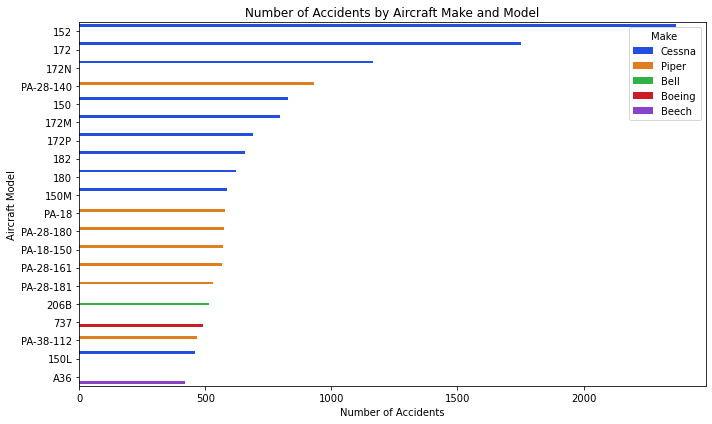

In [12]:
# Grouping the data by Make and Model to count the number of accidents
accident_counts = aviation_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Sorting the values for better visualization and then grabbing the first 30 values because the dataset is too large
accident_counts = accident_counts.sort_values('Accident_Count', ascending=False).head(20)

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=accident_counts, x='Accident_Count', y='Model', hue='Make', palette='bright')

# Adding titles and labels
plt.title('Number of Accidents by Aircraft Make and Model')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.tight_layout()  # Adjust layout to prevent label overlap

# Displaying the plot
plt.show()

From the graph above, it is quite clear that Cessna and Piper aircrafts are quite prone to accidents. Also of importance to note is that while Boeing, Bell and Grumman appear in the top 30, it is only one particular model of each make that has a high vulnerability of accidents i.e. 737, 206B and G164A respectively.

### 4.2 Accidents by make and model based on the weather condition

It is also important to find out how an aircraft performs during different weather conditions.

For this, we have to create a new column combining the Make and Model for easier visualization

In [13]:
# Create a new column combining the Make and Model for easier visualization
aviation_data['Make_Model'] = aviation_data['Make'] + ' ' + aviation_data['Model']

Now, let us find the count of accidents based on weather and aircraft model. 

In [14]:
# Count the number of accidents based on weather and aircraft model
accident_counts_weather = aviation_data.groupby(['Weather.Condition', 'Make_Model']).size().reset_index(name='Accident_Count_Weather')

# Sorting the values for better visualization and then grabbing the first 30 values because the dataset is too large
accident_counts_weather = accident_counts_weather.sort_values('Accident_Count_Weather', ascending=False).head(30)


Now plot the graph using Seaborn:

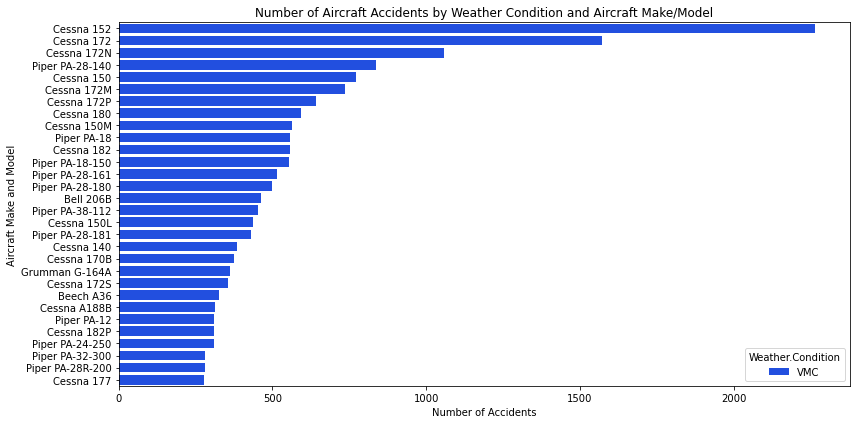

In [15]:
# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Accident_Count_Weather', y='Make_Model', hue='Weather.Condition', data=accident_counts_weather, palette='bright')

# Add plot title and labels
plt.title('Number of Aircraft Accidents by Weather Condition and Aircraft Make/Model')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make and Model')

# Show the plot
plt.tight_layout()
plt.show()

From the above graph, it is quite astonishing that the top 30 number of accidents based on weather condition happened under Visual Meteorological Conditions (VMC) i.e. weather conditions under which pilots have sufficient visibility to fly aircraft relying on visual references. Thus it can be concluded that weather may have played little to no role in the aircraft accident. It thus points more towards the make and model of the aircraft itself. It cements the fact that Cessna and Piper makes should be avoided at all costs because they are prone to accidents.

We can explore more by finding out the number of accidents based on weather condition. We plot a graph to show the same.

### 4.2.1 All Accidents based on Weather Condition

Let us see if we can have a better view of all the accidents based on weather condition.

In [ ]:
# First change all the values in the Weather column to Upper case since some values are in Title case

aviation_data["Weather.Condition"]= aviation_data["Weather.Condition"].str.upper()

# Count number of accidents by Weather.Condition
weather_counts = aviation_data['Weather.Condition'].value_counts().reset_index()
weather_counts.columns = ['Weather.Condition', 'Count']

Now plot the graph using Seaborn to visualize the number of Accidents by weather condition.

In [ ]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_counts, x='Weather.Condition', y='Count', palette='bright')

# Add labels and title
plt.title('Number of Aircraft Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

# Show plot
plt.show()

From the graph above, it is clear that over 75, 000 accidents took place under VMC conditions. We can thus draw the conclusion that weather plays little to no role for most of the accidents.

## 5. Which city is the most dangerous to fly into

As the company ventures into aviation business, it is also important to know which is the most dangerous city to fly into.

In [ ]:
most_dangerous_cities = aviation_data['Location'].value_counts().head(30)

Let us now convert the dictionary to a pandas series for easier plotting

In [ ]:
# Convert the dictionary to a pandas series for easier plotting
most_dangerous_cities_series = pd.Series(most_dangerous_cities)

In [ ]:
# Plotting the graph for least accidents per make
plt.figure(figsize=(10, 6))
most_dangerous_cities.plot(kind='bar', color='navy')
plt.title('Top 30 Most Dangerous Cities to Fly Into')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

From the data above, it is clear that the most dangerous city to fly into is Achorage, Alaska followed by Miami, Florida. Anchorage is located in Alaska with extreme cold temperature and weather. Thus, while most accidents may have happened under VMC, it is imperative to note that extreme cold temperature and weather contributes significantly to aircraft accidents. This is important information as the company ventures into the business.